C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<Figure size 432x288 with 0 Axes>

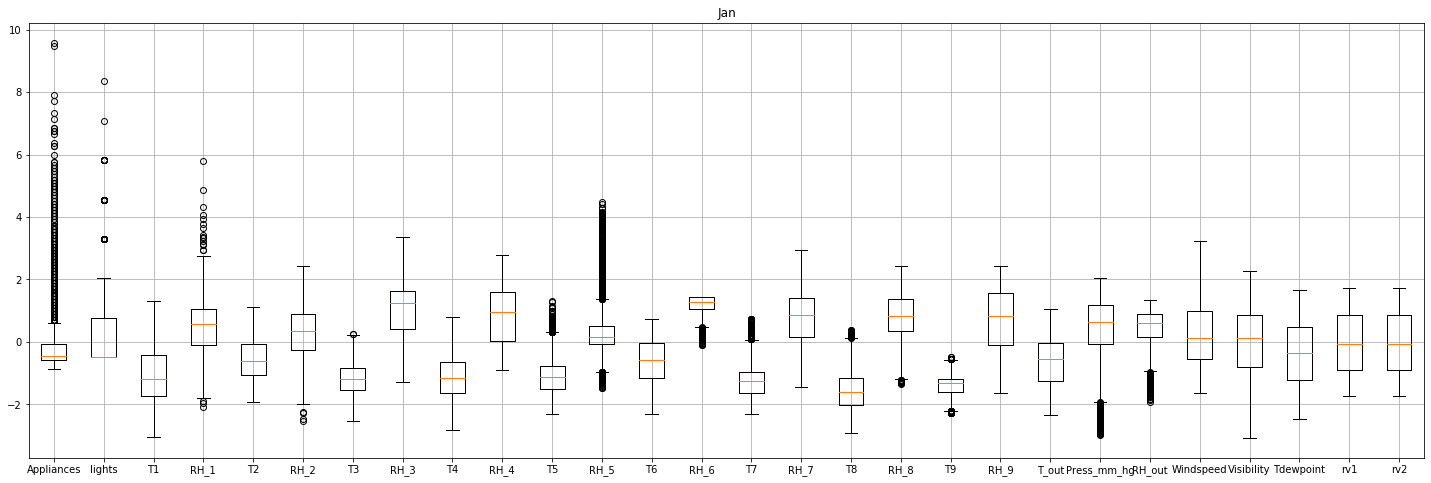

<Figure size 432x288 with 0 Axes>

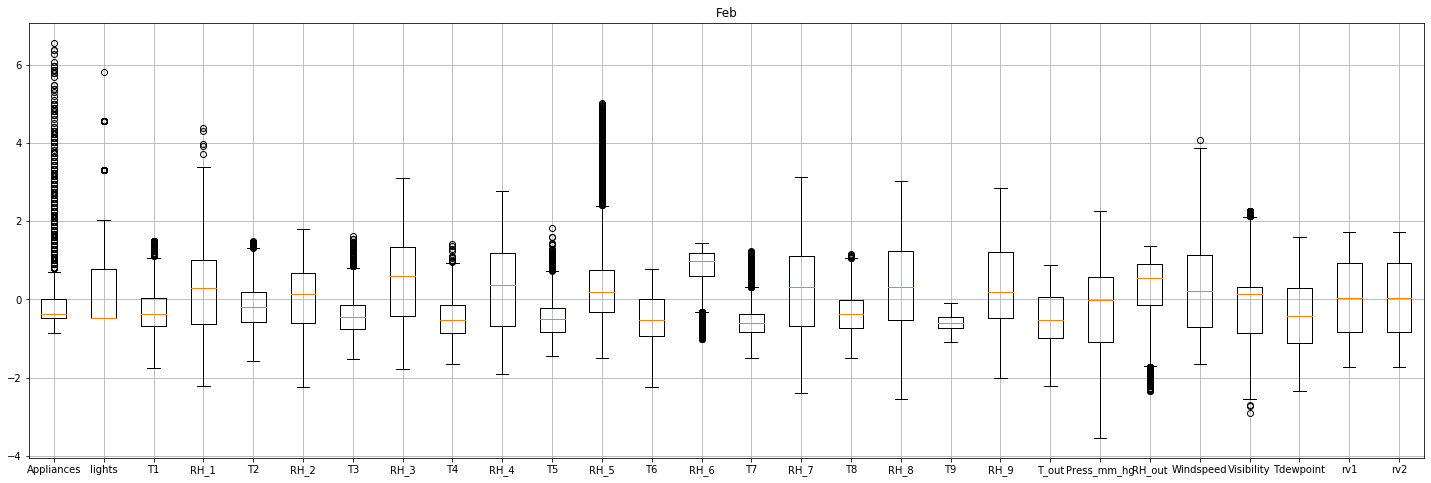

<Figure size 432x288 with 0 Axes>

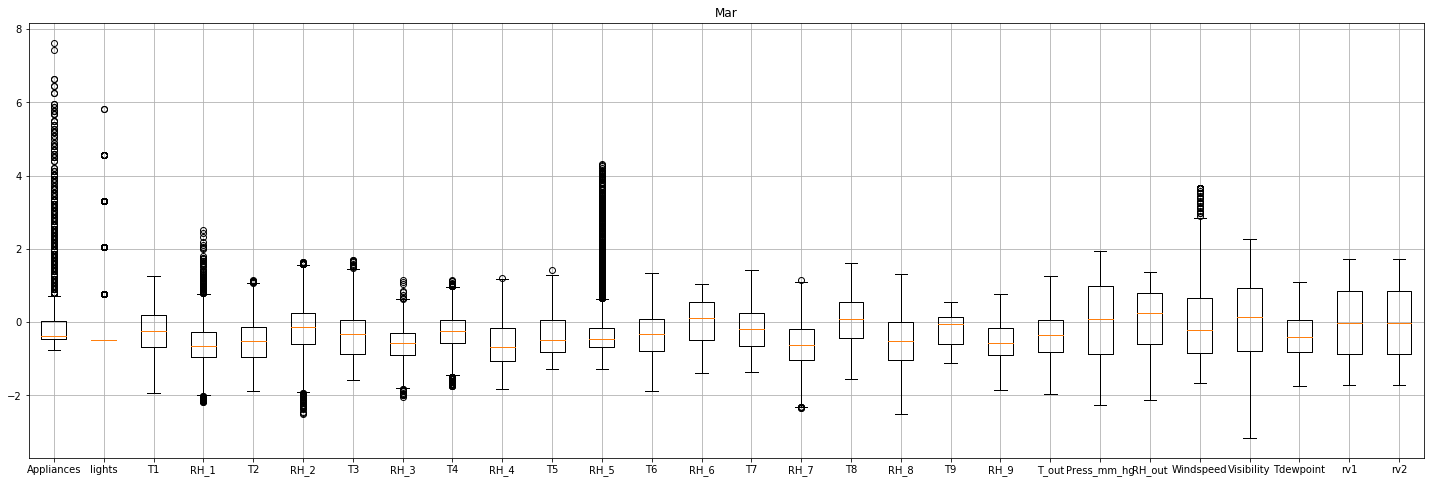

<Figure size 432x288 with 0 Axes>

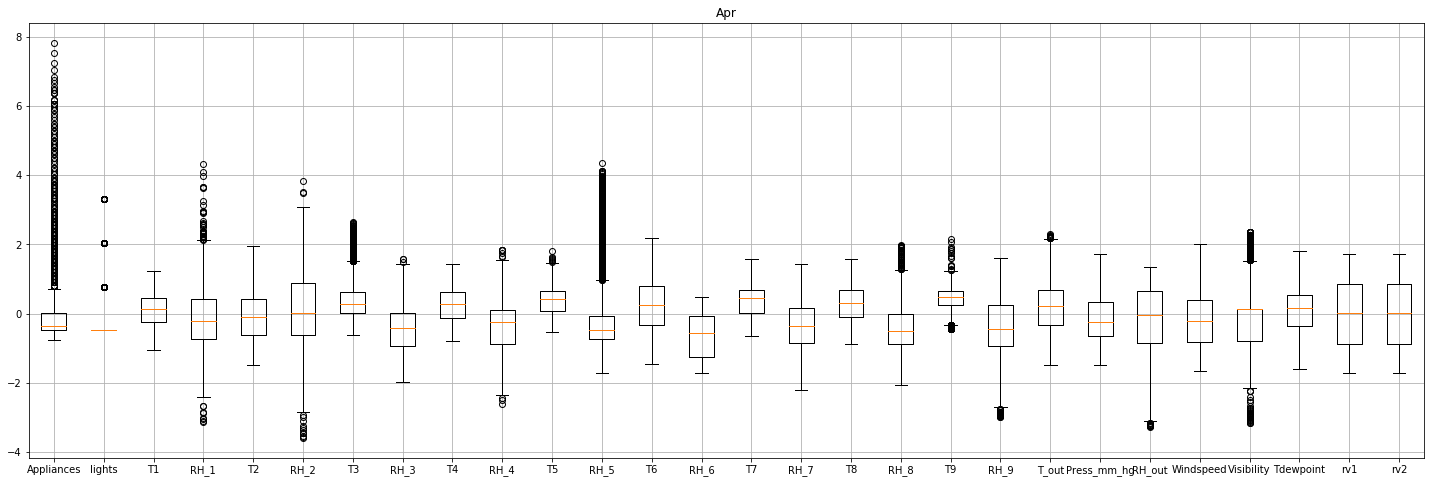

<Figure size 432x288 with 0 Axes>

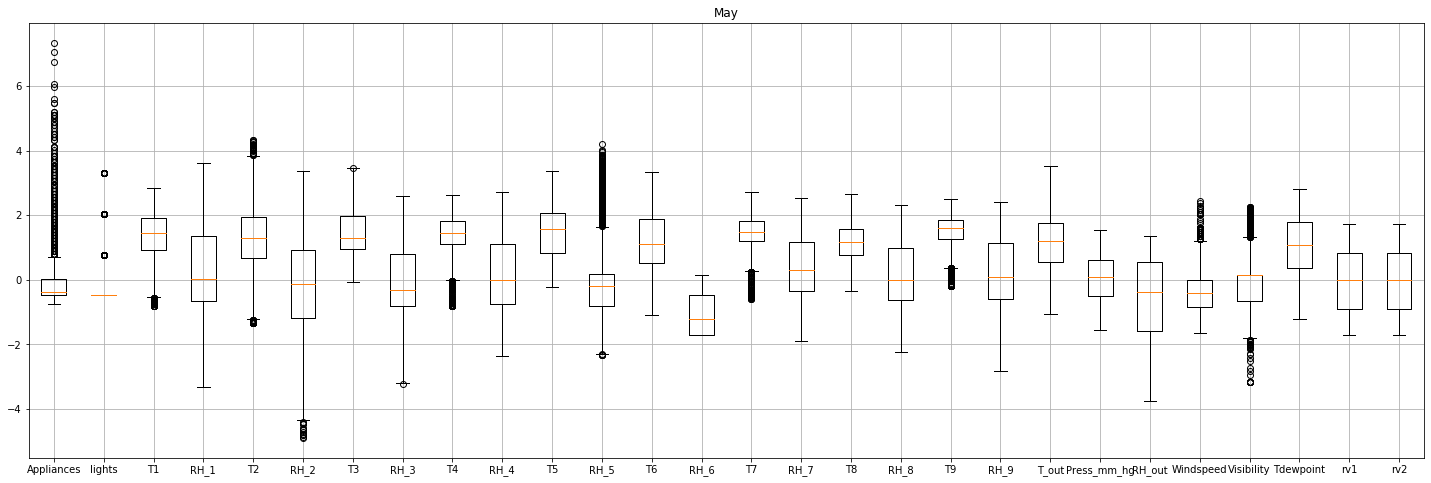

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KernelDensity, LocalOutlierFactor
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor 
from sklearn import model_selection
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.covariance import EllipticEnvelope
import seaborn as sns


#Load Data
a=["date", "Month","Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
b=["Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
c=["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
d=["Appliances"]
l=["lights"]
df = pd.read_csv("energydata_complete_month.csv",usecols=a)
df2=  pd.read_csv("energydata_complete_month.csv",usecols=b)
df1 = df[['date','Month']]
data = df[['Appliances','lights','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9','T_out','Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',"Tdewpoint",'rv1', 'rv2' ]]
months = ["Jan","Feb","Mar","Apr","May"]
scaler = StandardScaler()
scaler.fit(data)
#print()
#print(scaler.data_max_)
data_trans = scaler.transform(data)
df2.loc[:,:]=data_trans
df2.head()
df = pd.concat([df1, df2], axis=1)
df.head()
monthly_energy = {}
for i in range(1,6,1):
    monthly_energy[i] = df.query("Month=={0}".format(i))
    monthly_energy[i].reset_index(inplace=True, drop=True)
for i in range(1,6,1):
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(25,8))
    ax.boxplot(np.array(monthly_energy[i][b]))
    ax.set_xticklabels(b)
    plt.title(months[i-1])
    plt.grid()
    plt.show()

In [2]:
monthly_energy[1]

,date,Month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,1,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,...,-1.217324,0.958136,-0.152788,-2.976328,0.822080,1.207694,2.091596,0.366854,-0.807974,-0.807974
1,2016-01-11 17:10:00,1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,...,-1.200778,0.965363,-0.175352,-2.962813,0.822080,1.071703,1.766584,0.343017,-0.440240,-0.440240
2,2016-01-11 17:20:00,1,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,...,-1.233869,0.950910,-0.196035,-2.949298,0.822080,0.935713,1.441572,0.319180,0.252109,0.252109
3,2016-01-11 17:30:00,1,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,...,-1.233869,0.926821,-0.218599,-2.935783,0.822080,0.799723,1.116559,0.295343,1.408801,1.408801
4,2016-01-11 17:40:00,1,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,...,-1.233869,0.926821,-0.241162,-2.922268,0.822080,0.663733,0.791547,0.271506,-1.028122,-1.028122
5,2016-01-11 17:50:00,1,-0.465215,4.561378,-1.118645,1.449269,-0.520411,1.002425,-1.235063,1.748608,...,-1.233869,0.900324,-0.261845,-2.908753,0.822080,0.527743,0.466534,0.247669,1.374937,1.374937
6,2016-01-11 18:00:00,1,-0.367676,5.821493,-1.118645,1.383929,-0.520411,1.002425,-1.235063,1.738365,...,-1.233869,0.900324,-0.284409,-2.895238,0.822080,0.391753,0.141522,0.223832,1.534583,1.534583
7,2016-01-11 18:10:00,1,-0.367676,5.821493,-1.139400,1.331992,-0.520411,1.002425,-1.264973,1.738365,...,-1.233869,0.900324,-0.280648,-2.886228,0.810895,0.459748,0.141522,0.219064,0.555443,0.555443
8,2016-01-11 18:20:00,1,-0.367676,4.561378,-1.180910,1.341416,-0.520411,0.986044,-1.264973,1.704566,...,-1.233869,0.900324,-0.278768,-2.877219,0.799710,0.527743,0.141522,0.216680,0.446161,0.446161
9,2016-01-11 18:30:00,1,-0.270136,4.561378,-1.139400,1.465185,-0.506731,0.977853,-1.235063,1.727099,...,-1.233869,0.900324,-0.275007,-2.868209,0.788525,0.595738,0.141522,0.211913,-1.510646,-1.510646


In [3]:
parameters = monthly_energy[1].columns[2:]
parameters

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [4]:
num_rows = {}
for i in range(1,6,1):
    num_rows[i] = monthly_energy[i].shape[0]

In [5]:
outliers_fraction = 0.01
rng = np.random.RandomState(123)
anomaly_list = ["ellipticEnvelope", "kernelDensity", "gaussianMixture", 
                "localOutlierFactor", "isolationForest", "oneClassSVM"]

In [6]:
def ellipticEnvelope(inputs):
    """
    inputs: dataset
    returns:
        score_pred: evaluated scores on each day
        outlier_rows: rows evaluated as 1% outliers
    """
    clf = EllipticEnvelope(contamination=outliers_fraction)
    clf.fit(inputs)
    score_pred = clf.decision_function(inputs)
    pred = clf.predict(inputs)
    outlier_rows = [i for i in range(len(pred)) if pred[i]==-1]
    return score_pred,outlier_rows

In [7]:
def kernelDensity(inputs):
    """
    inputs: dataset
    returns:
        score_pred: evaluated scores on each day
        outlier_rows: rows evaluated as outliers
            On kernel density estimator, I defined rows with score 
            lower than 1.125 times the average as outliers
    """
    clf = KernelDensity(bandwidth=1, kernel="gaussian")
    clf.fit(inputs)
    score_pred = clf.score_samples(inputs)
    pred = np.where(score_pred <= np.average(score_pred)*1.125, -1, 1)
    outlier_rows = [i for i in range(len(pred)) if pred[i]==-1]
    return score_pred,outlier_rows

In [8]:
def gaussianMixture(inputs):
    """
    inputs: dataset
    returns:
        score_pred: evaluated scores on each day
        outlier_rows: rows evaluated as outliers
            On Gaussian mixture estimator, I defined rows with score 
            lower than 0.7 times the average as outliers
    """
    clf = GaussianMixture(n_components=5, covariance_type="full")
    clf.fit(inputs)
    score_pred = clf.score_samples(inputs)
    pred = np.where(score_pred <= np.average(score_pred)*0.7, -1, 1)
    outlier_rows = [i for i in range(len(pred)) if pred[i]==-1]
    return score_pred,outlier_rows

In [9]:
def localOutlierFactor(inputs):
    """
    inputs: dataset
    returns:
        score_pred: evaluated scores on each day
        outlier_rows: rows evaluated as 1% outliers
    """
    clf = LocalOutlierFactor(n_neighbors=20, contamination=outliers_fraction)
    clf.fit(inputs)
    score_pred = clf._decision_function(inputs)
    pred = clf._predict(inputs)
    outlier_rows = [i for i in range(len(pred)) if pred[i]==-1]
    return score_pred,outlier_rows

In [10]:
def isolationForest(inputs):
    """
    inputs: dataset
    returns:
        score_pred: evaluated scores on each day
        outlier_rows: rows evaluated as 1% outliers
    """
    clf = IsolationForest(contamination=outliers_fraction,
                          max_samples="auto",
                          random_state=rng,
                          n_estimators=100)
    clf.fit(inputs)
    score_pred = clf.decision_function(inputs)
    pred = clf.predict(inputs)
    outlier_rows = [i for i in range(len(pred)) if pred[i]==-1]
    return score_pred,outlier_rows

In [11]:
def oneClassSVM(inputs):
    """
    inputs: dataset
    returns:
        score_pred: evaluated scores on each day
        outlier_rows: rows evaluated as 1% outliers
    """
    clf = svm.OneClassSVM(nu=outliers_fraction,
                          kernel="rbf",
                          gamma=0.03)
    clf.fit(inputs)
    score_pred = clf.decision_function(inputs).T[0]
    pred = clf.predict(inputs)
    outlier_rows = [i for i in range(len(pred)) if pred[i]==-1]
    return score_pred,outlier_rows

In [12]:
monthly_pred = {}
for m,w in monthly_energy.items():
    monthly_pred[m] = {}
    # elliptic envelope
    s,o = ellipticEnvelope(w[parameters])
    monthly_pred[m]["ellipticEnvelope"] = {"score_pred":s, "outlier_rows":o}
    # kernel density estimator
    s,o = kernelDensity(w[parameters])
    monthly_pred[m]["kernelDensity"] = {"score_pred":s, "outlier_rows":o}
    # gaussian mixture
    s,o = gaussianMixture(w[parameters])
    monthly_pred[m]["gaussianMixture"] = {"score_pred":s, "outlier_rows":o}
    # local outlier factor
    s,o = localOutlierFactor(w[parameters])
    monthly_pred[m]["localOutlierFactor"] = {"score_pred":s, "outlier_rows":o}
    # isolation forest
    s,o = isolationForest(w[parameters])
    monthly_pred[m]["isolationForest"] = {"score_pred":s, "outlier_rows":o}
    # one class svm
    s,o = oneClassSVM(w[parameters])
    monthly_pred[m]["oneClassSVM"] = {"score_pred":s, "outlier_rows":o}

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:622: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-112.766337492290603 > -126.298629390219915)
  % (det, previous_det), RuntimeWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-116.054507615986026 > -129.168568269012610)
  % (det, previous_det), RuntimeWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-115.774410110991795 > -131.218167819692354)
  % (det, previous_det), RuntimeWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning:

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-103.359673243630326 > -124.454788958786537)
  % (det, previous_det), RuntimeWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-102.436249483535107 > -125.359883527135366)
  % (det, previous_det), RuntimeWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-109.554239863829110 > -139.519472570412631)
  % (det, previous_det), RuntimeWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-105.415781784867079 > -123.504959894467078)
  % (det, previous_det), RuntimeWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for mul

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-148.655043928140287 > -214.288406930019988)
  % (det, previous_det), RuntimeWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:622: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_de

In [13]:
stats_columns = ["MONTH","DATASIZE","NORMALS","OUTLIERS","OUTLIER_RATE"]
outliers = {}
for m in months:
    outliers[m] = {}

ellipticEnvelope


,MONTH,DATASIZE,NORMALS,OUTLIERS,OUTLIER_RATE
0,Jan,2922,2892,30,1.03
1,Feb,4176,4134,42,1.01
2,Mar,4464,4419,45,1.01
3,Apr,4320,4276,44,1.02
4,May,3853,3814,39,1.01


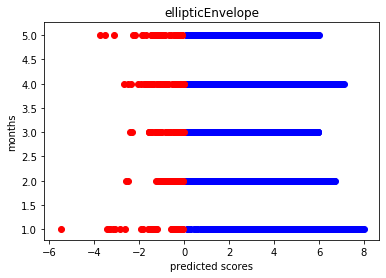

kernelDensity


,MONTH,DATASIZE,NORMALS,OUTLIERS,OUTLIER_RATE
0,Jan,2922,2922,0,0.0
1,Feb,4176,4176,0,0.0
2,Mar,4464,4464,0,0.0
3,Apr,4320,4320,0,0.0
4,May,3853,3853,0,0.0


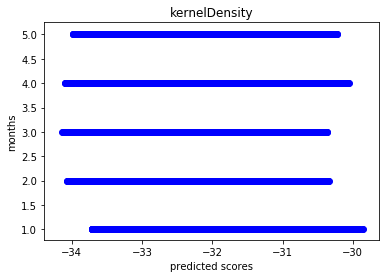

gaussianMixture


,MONTH,DATASIZE,NORMALS,OUTLIERS,OUTLIER_RATE
0,Jan,2922,1813,1109,37.95
1,Feb,4176,2665,1511,36.18
2,Mar,4464,2695,1769,39.63
3,Apr,4320,2396,1924,44.54
4,May,3853,2435,1418,36.8


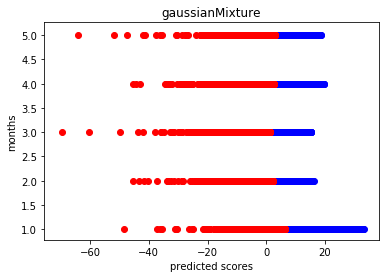

localOutlierFactor


,MONTH,DATASIZE,NORMALS,OUTLIERS,OUTLIER_RATE
0,Jan,2922,2901,21,0.72
1,Feb,4176,4151,25,0.6
2,Mar,4464,4431,33,0.74
3,Apr,4320,4293,27,0.62
4,May,3853,3825,28,0.73


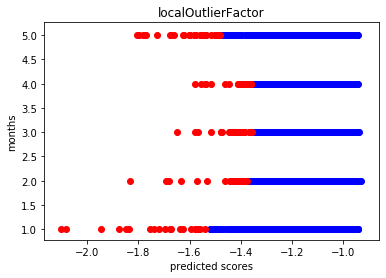

isolationForest


,MONTH,DATASIZE,NORMALS,OUTLIERS,OUTLIER_RATE
0,Jan,2922,2892,30,1.03
1,Feb,4176,4134,42,1.01
2,Mar,4464,4419,45,1.01
3,Apr,4320,4276,44,1.02
4,May,3853,3814,39,1.01


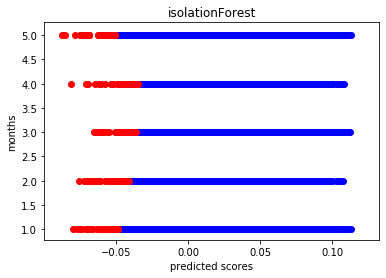

oneClassSVM


,MONTH,DATASIZE,NORMALS,OUTLIERS,OUTLIER_RATE
0,Jan,2922,2889,33,1.13
1,Feb,4176,4133,43,1.03
2,Mar,4464,4419,45,1.01
3,Apr,4320,4275,45,1.04
4,May,3853,3809,44,1.14


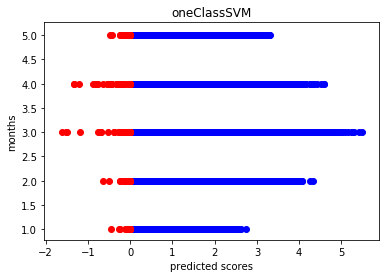

In [14]:
# drawing scatter plots on each algorithm, with month on y-axis
for aa in anomaly_list:
    data_size = []
    oks = []
    ngs = []
    ng_rate = []
    for i in range(1,6,1):
        # gathering outlier and normal rows on each month
        p_ng = monthly_pred[i][aa]["outlier_rows"]
        p_ok = np.delete(np.arange(0,num_rows[i]), p_ng)
        p_ng_score = monthly_pred[i][aa]["score_pred"][p_ng]
        p_ok_score = monthly_pred[i][aa]["score_pred"][p_ok]
        
        data_size.append(num_rows[i])
        oks.append(len(p_ok))
        ngs.append(len(p_ng))
        ng_rate.append(round(100*len(p_ng)/num_rows[i], 2))
        
        for n in p_ng:
            outliers[months[i-1]][n] = 1 if n not in outliers[months[i-1]].keys() else outliers[months[i-1]][n]+1      
        # scatter plot 
        plt.scatter(p_ok_score, np.zeros(len(p_ok_score))+i, c="blue")
        plt.scatter(p_ng_score, np.zeros(len(p_ng_score))+i, c="red")
    print(aa)
    stats = pd.DataFrame(np.array([months,data_size,oks,ngs,ng_rate]).T, columns=stats_columns)
    display(stats)
    plt.title(aa)
    plt.xlabel("predicted scores")
    plt.ylabel("months")
    plt.show()
    plt.close()

In [15]:
outliers

{'Jan': {393: 2,
  431: 2,
  432: 3,
  433: 2,
  434: 2,
  443: 2,
  731: 3,
  732: 2,
  867: 3,
  868: 2,
  1028: 2,
  1031: 2,
  1032: 3,
  1307: 2,
  1451: 5,
  1452: 4,
  1453: 3,
  1454: 4,
  1455: 2,
  1821: 3,
  1822: 2,
  1823: 2,
  1824: 3,
  1825: 2,
  2748: 2,
  2749: 2,
  2750: 2,
  2751: 4,
  2752: 3,
  2753: 2,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 2,
  7: 1,
  8: 1,
  9: 1,
  10: 2,
  11: 2,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  79: 1,
  82: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  1

In [16]:
# all the days detected as outlier
for i in range(1,6,1):
    print(months[i-1])
    display(monthly_energy[i].iloc[list(outliers[months[i-1]].keys()),:])

Jan


,date,Month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
393,2016-01-14 10:30:00,1,5.777329,0.781035,-1.803566,0.881315,-0.839621,0.402874,-1.469354,1.199111,...,-1.288469,1.167704,-0.998919,-0.908551,0.956302,0.391753,0.141522,-0.598548,0.025092,0.025092
431,2016-01-14 16:50:00,1,6.265028,-0.479080,-0.184662,0.077133,0.204650,-0.523482,-0.423772,1.289755,...,-1.233869,0.524547,-0.504403,-1.036943,-0.218138,1.139698,0.141522,-0.677926,-1.473828,-1.473828
432,2016-01-14 17:00:00,1,7.923204,-0.479080,-0.139000,0.360272,0.235051,-0.505463,-0.299565,1.440316,...,-1.233869,0.461114,-0.528846,-1.030185,-0.251694,1.207694,0.141522,-0.729652,-0.417353,-0.417353
433,2016-01-14 17:10:00,1,4.997011,0.781035,-0.033149,1.240684,0.266972,-0.448129,-0.153341,1.635943,...,-1.233869,0.427391,-0.532607,-1.025680,-0.251694,1.139698,0.141522,-0.733705,0.131428,0.131428
434,2016-01-14 17:20:00,1,4.021614,0.781035,0.045721,1.726544,0.361215,-0.333460,-0.050320,1.777286,...,-1.233869,0.411332,-0.534487,-1.021175,-0.251694,1.071703,0.141522,-0.737519,-1.361421,-1.361421
443,2016-01-14 18:50:00,1,6.752727,0.781035,0.298934,0.060379,0.619622,-0.440757,-0.050320,0.888259,...,-1.288469,0.186508,-0.626622,-0.958106,-0.195768,1.139698,0.141522,-0.813082,0.379368,0.379368
731,2016-01-16 18:50:00,1,9.581380,3.301264,0.151572,0.630008,0.318653,-0.575083,-0.781438,0.427358,...,-0.841744,-0.211953,-1.002679,1.285364,0.385860,-0.152208,0.141522,-0.916368,0.166973,0.166973
732,2016-01-16 19:00:00,1,6.362568,2.041149,0.296858,0.537862,0.431028,-0.498910,-0.701680,0.762279,...,-0.841744,-0.231826,-1.017722,1.294374,0.486526,-0.424188,0.141522,-0.872675,0.867331,0.867331
867,2016-01-17 17:30:00,1,6.850267,0.781035,-0.116170,-0.879509,-0.109999,-1.067189,-0.736574,-0.609158,...,-0.687872,-1.033967,-1.393780,1.260586,-0.117472,-0.832158,0.141522,-1.730810,0.452834,0.452834
868,2016-01-17 17:40:00,1,6.752727,0.781035,-0.074659,-0.410402,-0.109999,-0.830406,-0.736574,-0.609158,...,-0.687872,-1.026740,-1.443983,1.258334,-0.005621,-0.832158,0.141522,-1.723659,0.771384,0.771384


Feb


,date,Month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
69,2016-02-01 11:30:00,2,5.972409,0.781035,0.027041,1.166130,0.455457,0.827966,-0.487329,1.799819,...,-0.841744,2.169778,0.730948,0.638902,-0.218138,1.615664,-1.130266,0.807841,-0.075463,-0.075463
81,2016-02-01 13:30:00,2,5.289630,0.781035,0.718188,1.088224,0.934271,0.624839,0.365088,2.188000,...,-0.886416,1.914442,0.749751,0.598357,-0.218138,2.227619,-0.367193,0.855515,-0.353978,-0.353978
90,2016-02-01 15:00:00,2,5.874869,0.781035,1.019139,1.282569,1.116677,0.486418,0.978231,1.820303,...,-0.886416,1.849404,0.787356,0.551055,-0.117472,1.615664,0.141522,0.962782,1.082970,1.082970
1075,2016-02-08 11:10:00,2,5.972409,2.041149,-0.558255,0.971786,-0.155601,0.542114,-0.487329,1.277464,...,-0.241146,0.726086,0.087889,-2.190212,0.039120,2.635590,1.766584,0.211913,-1.291287,-1.291287
1076,2016-02-08 11:20:00,2,5.484710,-0.479080,-0.558255,0.962571,-0.155601,0.542114,-0.454096,1.316385,...,-0.277546,0.693165,0.067205,-2.187960,0.061490,2.431605,1.441572,0.199995,-0.421592,-0.421592
1089,2016-02-08 13:30:00,2,6.362568,2.041149,-0.365232,1.114193,-0.023357,0.533104,0.310254,1.021408,...,-0.241146,0.355126,0.195065,-2.172192,-0.687915,3.451530,0.141522,-0.157562,-0.869978,-0.869978
1099,2016-02-08 15:10:00,2,5.874869,2.041149,-0.246927,1.006969,-0.023357,0.502799,0.745602,0.969173,...,-0.241146,0.242714,0.125494,-2.118133,-0.732655,2.499600,-0.847647,-0.283899,-1.460062,-1.460062
1267,2016-02-09 19:10:00,2,5.777329,0.781035,0.527241,1.197962,0.786827,-0.154906,0.061010,0.825781,...,-0.208056,0.340673,-0.673629,-2.609173,0.889191,0.051778,0.141522,-0.240992,-1.673661,-1.673661
1269,2016-02-09 19:30:00,2,0.022483,0.781035,0.649696,4.313330,0.846489,0.318716,0.102135,1.269783,...,-0.241146,0.324614,-0.698073,-2.577639,0.889191,0.187768,0.141522,-0.264829,1.229261,1.229261
1551,2016-02-11 18:30:00,2,5.777329,0.781035,0.236668,0.361947,0.660663,-0.127877,-0.582042,0.917961,...,-0.439691,0.026722,-0.688671,-0.928824,1.023413,-0.628173,0.141522,-0.169481,-0.246986,-0.246986


Mar


,date,Month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
258,2016-03-02 19:00:00,3,5.192091,-0.479080,-0.184662,0.462470,0.022245,-0.572626,-0.686725,0.159011,...,-0.593563,-0.704760,-0.698073,-1.678899,0.352304,1.615664,0.141522,-0.586630,0.431881,0.431881
260,2016-03-02 19:20:00,3,-0.270136,0.781035,0.008361,2.430203,0.072406,-0.177839,-0.631891,0.549240,...,-0.593563,-0.777025,-0.816531,-1.633850,0.553637,1.207694,0.508927,-0.617618,-1.721452,-1.721452
521,2016-03-04 14:50:00,3,5.679789,-0.479080,-0.365232,-0.341712,-0.023357,-0.702856,-0.668447,-0.126748,...,-0.536127,-0.683998,-0.429191,-2.260039,0.452970,-0.356193,-0.706337,-0.176632,1.421743,1.421743
661,2016-03-05 14:10:00,3,4.997011,-0.479080,-1.299215,-0.922231,-1.117789,-0.611122,-1.080532,-0.996315,...,-0.593563,-1.017908,-0.331416,-1.744221,-0.631989,-1.240129,-0.988956,-0.753489,1.369946,1.369946
673,2016-03-05 16:10:00,3,4.801932,-0.479080,-1.118645,-0.753855,-1.022026,-0.578359,-0.616936,-0.105239,...,-0.507527,-0.834034,-0.030570,-1.714939,-1.638652,-1.172134,-0.706337,-1.206394,-0.116161,-0.116161
924,2016-03-07 10:00:00,3,5.874869,-0.479080,-1.672808,-0.643280,-1.360996,-0.242545,-1.434459,-0.627594,...,-0.969143,-0.871772,-1.149342,-0.989641,1.090524,-0.016218,2.091596,-0.729652,-1.437041,-1.437041
925,2016-03-07 10:10:00,3,5.192091,-0.479080,-1.610542,-0.519302,-1.295634,-0.259745,-1.407042,-0.477033,...,-0.985688,-0.913525,-1.121138,-0.980631,1.056969,-0.152208,1.597012,-0.713681,-0.266382,-0.266382
930,2016-03-07 11:00:00,3,4.801932,-0.479080,-1.319970,-0.149881,-1.052427,-0.308889,-0.719957,0.251191,...,-0.985688,-1.009075,-0.980116,-0.935581,0.889191,-0.832158,-0.875909,-0.634304,-0.183976,-0.183976
934,2016-03-07 11:40:00,3,4.021614,-0.479080,-1.050153,1.565708,-0.809220,-0.103305,-0.598658,0.406873,...,-0.985688,-1.074917,-0.842855,-0.917561,0.441785,-0.288198,-0.197622,-0.713681,-0.746487,-0.746487
935,2016-03-07 11:50:00,3,5.192091,-0.479080,-1.019020,1.543090,-0.839621,-0.088562,-0.598658,0.671123,...,-0.985688,-1.074917,-0.807129,-0.913056,0.329934,-0.152208,-0.028050,-0.733705,1.300157,1.300157


Apr


,date,Month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
487,2016-04-04 9:10:00,4,6.362568,0.781035,-0.095414,1.308537,-0.251363,1.779713,0.165692,0.682390,...,0.503396,1.078578,0.542919,-0.840977,0.710229,0.391753,-0.013919,1.182083,-0.108153,-0.108153
498,2016-04-04 11:00:00,4,6.069949,0.781035,0.126666,1.417437,0.604422,1.158047,0.930043,0.847290,...,0.519941,0.972589,0.674539,-0.759888,0.218082,1.207694,0.141522,1.058130,-1.047096,-1.047096
506,2016-04-04 12:20:00,4,6.752727,-0.479080,0.437994,1.332830,0.934271,0.625658,1.362068,0.673172,...,0.553032,0.693968,1.144611,-0.764393,-0.743840,1.207694,0.141522,0.955631,-1.441650,-1.441650
507,2016-04-04 12:30:00,4,6.167488,-0.479080,0.437994,1.215553,0.967712,0.591258,1.362068,0.775594,...,0.553032,0.750174,1.144611,-0.766645,-0.788581,1.207694,0.141522,0.927026,0.063780,0.063780
525,2016-04-04 15:30:00,4,6.069949,0.781035,0.817813,0.898069,0.874990,0.083441,1.981441,-0.106007,...,0.647340,0.479983,1.407852,-0.840977,-1.325468,1.207694,0.141522,0.807841,0.903623,0.903623
526,2016-04-04 15:40:00,4,7.825664,-0.479080,0.817813,0.730531,0.847629,0.001535,1.910406,-0.096021,...,0.602668,0.428996,1.389049,-0.845482,-1.347839,1.207694,0.141522,0.772085,-0.681753,-0.681753
527,2016-04-04 15:50:00,4,6.460108,-0.479080,0.772152,0.688646,0.888670,0.003173,1.943639,0.027910,...,0.602668,0.411332,1.370246,-0.849987,-1.370209,1.207694,0.141522,0.736329,0.581435,0.581435
528,2016-04-04 16:00:00,4,5.874869,-0.479080,0.817813,1.038801,0.888670,0.134222,1.943639,0.005377,...,0.647340,0.388046,1.351443,-0.854492,-1.392579,1.207694,0.141522,0.700574,1.316827,1.316827
529,2016-04-04 16:10:00,4,5.484710,-0.479080,0.838569,1.591676,0.888670,0.592896,2.073246,0.148769,...,0.647340,0.388046,1.370246,-0.861249,-1.448505,1.071703,0.141522,0.676736,-0.612317,-0.612317
623,2016-04-05 7:50:00,4,5.874869,0.781035,0.319689,1.082361,-0.338006,2.065564,0.896811,0.263482,...,0.733376,1.199019,0.396256,-0.861249,0.933932,-1.240129,-0.635682,1.124874,-1.546250,-1.546250


May


,date,Month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
683,2016-05-05 17:50:00,5,4.119153,-0.479080,1.502734,-1.146732,1.698854,-2.988032,0.664182,-1.632358,...,0.668613,-1.493365,2.197574,0.451946,-3.338795,0.391753,0.141522,-0.627153,-0.852866,-0.852866
684,2016-05-05 18:00:00,5,3.826534,-0.479080,1.502734,-0.962440,1.668453,-2.980046,0.664182,-1.675376,...,0.696977,-1.463220,2.197574,0.442936,-3.338795,0.391753,0.141522,-0.634304,1.709478,1.709478
765,2016-05-06 7:30:00,5,5.582250,-0.479080,0.687056,-0.718672,0.163609,-0.373594,0.808744,-0.719774,...,0.801212,-0.192321,0.524116,-0.043599,-0.083917,-0.832158,0.141522,0.664818,-1.279044,-1.279044
777,2016-05-06 9:30:00,5,4.997011,-0.479080,0.631017,-0.718672,2.501437,-2.193544,0.714031,-1.060841,...,0.960757,-0.241117,1.483064,-0.104416,-1.124136,-0.832158,0.141522,1.046212,-0.605019,-0.605019
973,2016-05-07 18:10:00,5,4.509312,0.781035,2.374452,-1.673639,2.580480,-2.413052,1.556479,-1.111028,...,1.391882,-0.826463,2.893281,-0.588699,-2.600575,-0.424188,0.141522,1.224990,-1.329252,-1.329252
974,2016-05-07 18:20:00,5,5.192091,-0.479080,2.374452,-1.273223,2.580480,-2.365547,1.523246,-1.047526,...,1.391882,-0.807537,2.930887,-0.593204,-2.667686,-0.424188,0.141522,1.177316,-0.593389,-0.593389
1258,2016-05-09 17:40:00,5,4.314233,2.041149,2.305960,-0.000772,2.626081,-1.217225,2.094135,-0.446306,...,2.042116,-0.167751,2.968493,-0.440036,-2.511094,-0.424188,0.141522,1.384698,-0.949768,-0.949768
1775,2016-05-13 7:50:00,5,4.509312,-0.479080,1.932366,1.750837,1.674837,1.911581,2.143035,1.195526,...,2.240660,1.297781,1.201020,-1.185606,0.676673,-0.900153,1.879632,1.987777,0.546945,0.546945
1776,2016-05-13 8:00:00,5,5.484710,0.781035,1.932366,2.070835,1.944667,1.636728,2.109802,1.195526,...,2.254842,1.295028,1.257429,-1.178849,0.553637,-0.832158,1.922025,1.987777,1.028448,1.028448
1795,2016-05-13 11:10:00,5,4.899471,2.041149,1.994632,1.978689,3.910899,-0.607641,2.408896,0.982488,...,2.384605,1.135013,2.178771,-1.066225,-0.486582,-0.288198,-1.229183,2.440682,0.210419,0.210419


In [17]:
# pick up timestamps detected by more than or equal to 3 algorithms
out_more_than_three = {}
for m,v in outliers.items():
    out_more_than_three[m] = []
    for k,n in v.items():
        if n >= 3:
            out_more_than_three[m].append(k)

In [18]:
out_more_than_three

{'Jan': [432,
  731,
  867,
  1032,
  1451,
  1452,
  1453,
  1454,
  1821,
  1824,
  2751,
  2752,
  850,
  852,
  860,
  893,
  1894,
  2185,
  2905],
 'Feb': [69,
  90,
  1089,
  1267,
  1269,
  2212,
  2655,
  3534,
  4106,
  4107,
  4123,
  4124,
  4125,
  4126,
  4127,
  4128,
  4129,
  4130,
  4131,
  48,
  1137,
  2287,
  3988,
  3990,
  4134],
 'Mar': [260,
  521,
  924,
  935,
  1932,
  1933,
  1979,
  2245,
  2261,
  2262,
  2268,
  2271,
  3523,
  3570,
  3671,
  3983,
  3985,
  1679,
  1680,
  1835,
  2402,
  2403,
  2409,
  3673,
  3719,
  3720,
  3721,
  3722,
  3979],
 'Apr': [526,
  623,
  1690,
  1694,
  2367,
  2843,
  3131,
  3998,
  4102,
  4236,
  4251,
  534,
  536,
  1915,
  1918,
  2262,
  2836,
  2838,
  2839,
  2841,
  2977,
  3279,
  3994],
 'May': [765,
  973,
  1805,
  1835,
  1979,
  2938,
  2948,
  3659,
  3700,
  190,
  191,
  1978,
  3088]}

In [19]:
for i in range(1,6,1):
    print(months[i-1])
    display(monthly_energy[i].iloc[out_more_than_three[months[i-1]],:])

Jan


,date,Month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
432,2016-01-14 17:00:00,1,7.923204,-0.479080,-0.139000,0.360272,0.235051,-0.505463,-0.299565,1.440316,...,-1.233869,0.461114,-0.528846,-1.030185,-0.251694,1.207694,0.141522,-0.729652,-0.417353,-0.417353
731,2016-01-16 18:50:00,1,9.581380,3.301264,0.151572,0.630008,0.318653,-0.575083,-0.781438,0.427358,...,-0.841744,-0.211953,-1.002679,1.285364,0.385860,-0.152208,0.141522,-0.916368,0.166973,0.166973
867,2016-01-17 17:30:00,1,6.850267,0.781035,-0.116170,-0.879509,-0.109999,-1.067189,-0.736574,-0.609158,...,-0.687872,-1.033967,-1.393780,1.260586,-0.117472,-0.832158,0.141522,-1.730810,0.452834,0.452834
1032,2016-01-18 21:00:00,1,4.899471,-0.479080,-0.738825,0.110641,-0.400328,0.126032,-0.736574,2.332416,...,-1.288469,-0.834034,-1.957867,0.172639,0.218082,-0.832158,-1.215052,-2.207552,-0.563538,-0.563538
1451,2016-01-21 18:50:00,1,9.483840,3.301264,-1.299215,-1.497724,-0.873062,-1.586621,-1.932949,-0.710556,...,-1.730230,-1.113458,-1.509794,1.217789,0.206897,-1.240129,2.190513,-1.664067,-0.914187,-0.914187
1452,2016-01-21 19:00:00,1,7.728124,2.041149,-1.218270,-0.602233,-0.809220,-1.555497,-1.932949,-0.731040,...,-1.730230,-1.161635,-1.544203,1.213284,0.285193,-1.240129,2.176382,-1.659299,-1.501521,-1.501521
1453,2016-01-21 19:10:00,1,4.801932,3.301264,-1.139400,1.860574,-0.748418,-1.553040,-1.914671,-0.432991,...,-1.730230,-1.184920,-1.537998,1.217789,0.285193,-1.172134,2.162251,-1.652148,0.607063,0.607063
1454,2016-01-21 19:20:00,1,0.022483,-0.479080,-1.118645,2.321304,-0.748418,-1.521915,-1.914671,-0.248631,...,-1.730230,-1.217038,-1.531605,1.222294,0.285193,-1.104138,2.148120,-1.642613,1.056771,1.056771
1821,2016-01-24 8:30:00,1,7.337965,2.041149,-2.544525,0.981838,-1.557082,0.690364,-2.012707,1.243665,...,-1.978411,1.761080,-0.199796,1.605216,1.056969,0.799723,1.158952,0.450284,1.098550,1.098550
1824,2016-01-24 9:00:00,1,5.972409,2.041149,-2.384711,1.617644,-1.432438,0.805851,-1.648810,2.311931,...,-1.978411,1.680785,-0.152788,1.618731,1.023413,0.391753,0.141522,0.486040,-1.479099,-1.479099


Feb


,date,Month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
69,2016-02-01 11:30:00,2,5.972409,0.781035,0.027041,1.166130,0.455457,0.827966,-0.487329,1.799819,...,-0.841744,2.169778,0.730948,0.638902,-0.218138,1.615664,-1.130266,0.807841,-0.075463,-0.075463
90,2016-02-01 15:00:00,2,5.874869,0.781035,1.019139,1.282569,1.116677,0.486418,0.978231,1.820303,...,-0.886416,1.849404,0.787356,0.551055,-0.117472,1.615664,0.141522,0.962782,1.082970,1.082970
1089,2016-02-08 13:30:00,2,6.362568,2.041149,-0.365232,1.114193,-0.023357,0.533104,0.310254,1.021408,...,-0.241146,0.355126,0.195065,-2.172192,-0.687915,3.451530,0.141522,-0.157562,-0.869978,-0.869978
1267,2016-02-09 19:10:00,2,5.777329,0.781035,0.527241,1.197962,0.786827,-0.154906,0.061010,0.825781,...,-0.208056,0.340673,-0.673629,-2.609173,0.889191,0.051778,0.141522,-0.240992,-1.673661,-1.673661
1269,2016-02-09 19:30:00,2,0.022483,0.781035,0.649696,4.313330,0.846489,0.318716,0.102135,1.269783,...,-0.241146,0.324614,-0.698073,-2.577639,0.889191,0.187768,0.141522,-0.264829,1.229261,1.229261
2212,2016-02-16 8:40:00,2,5.777329,-0.479080,-1.180910,-0.618987,-1.295634,-0.317898,-0.985819,-0.261946,...,-0.841744,-0.462271,-1.801803,2.226900,0.822080,-1.240129,1.074166,-1.675985,1.644417,1.644417
2655,2016-02-19 10:30:00,2,5.874869,-0.479080,-1.299215,-0.853540,-0.856341,-0.971508,-1.279927,-0.740054,...,-1.029368,-1.284967,-0.857897,0.719991,0.520081,-0.628173,-1.384624,-0.670060,1.444696,1.444696
3534,2016-02-25 13:00:00,2,5.972409,3.301264,-0.614294,-0.183389,-0.292405,-0.464510,-0.033703,0.108824,...,-0.623345,-0.897466,-0.246803,0.186154,-1.526801,-0.424188,-0.960694,-1.325580,0.579650,0.579650
4106,2016-02-29 12:20:00,2,5.484710,-0.479080,-1.299215,-1.774161,-0.596414,-2.079695,-1.015728,-1.784968,...,-0.654781,-0.424532,-0.504403,0.983531,-1.638652,1.207694,-0.932432,-1.747496,1.560570,1.560570
4107,2016-02-29 12:30:00,2,4.997011,-0.479080,-1.160155,-1.330186,-0.554612,-2.014375,-0.935970,-1.511500,...,-0.638235,-0.398035,-0.481839,0.976774,-1.694578,1.207694,-0.918302,-1.766566,1.678534,1.678534


Mar


,date,Month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
260,2016-03-02 19:20:00,3,-0.270136,0.781035,0.008361,2.430203,0.072406,-0.177839,-0.631891,0.549240,...,-0.593563,-0.777025,-0.816531,-1.633850,0.553637,1.207694,0.508927,-0.617618,-1.721452,-1.721452
521,2016-03-04 14:50:00,3,5.679789,-0.479080,-0.365232,-0.341712,-0.023357,-0.702856,-0.668447,-0.126748,...,-0.536127,-0.683998,-0.429191,-2.260039,0.452970,-0.356193,-0.706337,-0.176632,1.421743,1.421743
924,2016-03-07 10:00:00,3,5.874869,-0.479080,-1.672808,-0.643280,-1.360996,-0.242545,-1.434459,-0.627594,...,-0.969143,-0.871772,-1.149342,-0.989641,1.090524,-0.016218,2.091596,-0.729652,-1.437041,-1.437041
935,2016-03-07 11:50:00,3,5.192091,-0.479080,-1.019020,1.543090,-0.839621,-0.088562,-0.598658,0.671123,...,-0.985688,-1.074917,-0.807129,-0.913056,0.329934,-0.152208,-0.028050,-0.733705,1.300157,1.300157
1932,2016-03-14 10:00:00,3,6.265028,-0.479080,-1.050153,-1.673639,-0.581213,-1.708661,-1.133704,-1.541202,...,0.007034,-1.009075,-0.980116,1.794424,0.083861,1.207694,2.261168,-1.087209,0.560485,0.560485
1933,2016-03-14 10:10:00,3,7.435505,-0.479080,-1.050153,-1.892276,-0.462650,-1.757805,-1.113764,-1.396787,...,-0.047565,-0.938416,-0.942510,1.792172,0.016750,1.071703,2.261168,-1.079343,1.053150,1.053150
1979,2016-03-14 17:50:00,3,4.704392,0.781035,0.319689,-1.575629,0.098247,-1.749614,0.878533,-1.542226,...,0.106307,-0.927978,-0.034330,1.499349,-1.381394,0.119773,-1.130266,-0.960157,-1.299122,-1.299122
2245,2016-03-16 14:10:00,3,5.972409,3.301264,-0.246927,-0.629039,0.177289,-1.110748,-0.332797,-0.514929,...,0.106307,-0.895860,0.063445,1.195265,-1.795245,1.615664,-0.974825,-1.230231,-0.773746,-0.773746
2261,2016-03-16 16:50:00,3,5.289630,2.041149,-0.205417,-1.516153,-0.265044,-1.765995,0.027777,-1.498185,...,0.106307,-0.879801,0.057804,1.156972,-2.007762,1.955639,-0.932432,-1.451916,-0.161287,-0.161287
2262,2016-03-16 17:00:00,3,4.899471,2.041149,-0.246927,-1.707146,-0.322806,-1.929807,-0.018749,-1.644649,...,0.106307,-0.879801,0.035240,1.159225,-1.996577,2.023634,-0.960694,-1.468602,-0.588398,-0.588398


Apr


,date,Month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
526,2016-04-04 15:40:00,4,7.825664,-0.479080,0.817813,0.730531,0.847629,0.001535,1.910406,-0.096021,...,0.602668,0.428996,1.389049,-0.845482,-1.347839,1.207694,0.141522,0.772085,-0.681753,-0.681753
623,2016-04-05 7:50:00,4,5.874869,0.781035,0.319689,1.082361,-0.338006,2.065564,0.896811,0.263482,...,0.733376,1.199019,0.396256,-0.861249,0.933932,-1.240129,-0.635682,1.124874,-1.546250,-1.546250
1690,2016-04-12 17:40:00,4,6.557647,-0.479080,0.707811,2.137012,0.934271,-0.152448,0.509650,-0.003841,...,0.850849,-0.109779,1.125809,-0.579689,-1.459690,-0.424188,0.141522,0.359703,-1.607267,-1.607267
1694,2016-04-12 18:20:00,4,6.362568,-0.479080,0.880079,2.556695,0.861309,1.755960,0.630949,0.611718,...,0.850849,0.499656,1.144611,-0.593204,-1.370209,-0.424188,0.141522,0.469354,1.639206,1.639206
2367,2016-04-17 10:30:00,4,5.484710,2.041149,-0.095414,0.611579,0.282172,-0.130334,0.365088,-0.661393,...,0.801212,-0.221388,-0.039971,-0.117931,-0.050361,-0.016218,0.141522,0.009298,-1.164273,-1.164273
2843,2016-04-20 17:50:00,4,4.314233,2.041149,0.631017,-2.879912,0.756426,-3.372989,0.115844,-1.438780,...,0.354487,-1.749389,1.520669,1.303384,-3.215758,0.867718,0.141522,-1.230231,1.163046,1.163046
3131,2016-04-22 17:50:00,4,7.533045,-0.479080,0.749321,-0.670924,0.878410,-1.150063,2.440467,-0.361295,...,0.553032,-0.936810,1.050597,0.246971,-1.526801,0.459748,0.141522,0.207146,1.416863,1.416863
3998,2016-04-28 18:20:00,4,4.411773,-0.479080,-0.365232,-1.633429,-0.205762,-2.135391,0.197263,-0.514929,...,-0.345382,-2.887160,0.486510,0.082540,-2.376872,0.119773,0.141522,-1.294592,-1.556200,-1.556200
4102,2016-04-29 11:40:00,4,6.655187,-0.479080,-0.967132,-0.735426,-0.949064,-0.204049,-0.188235,-1.530960,...,-0.439691,-1.225067,-0.034330,-0.039094,0.620748,0.119773,-1.045480,0.414528,1.343627,1.343627
4236,2016-04-30 10:00:00,4,7.240426,-0.479080,-0.184662,-0.643280,-0.094799,-0.480072,0.215541,-0.815027,...,0.007034,-0.012622,-0.058774,0.442936,0.218082,-1.240129,0.141522,0.128483,1.571749,1.571749


May


,date,Month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
765,2016-05-06 7:30:00,5,5.582250,-0.479080,0.687056,-0.718672,0.163609,-0.373594,0.808744,-0.719774,...,0.801212,-0.192321,0.524116,-0.043599,-0.083917,-0.832158,0.141522,0.664818,-1.279044,-1.279044
973,2016-05-07 18:10:00,5,4.509312,0.781035,2.374452,-1.673639,2.580480,-2.413052,1.556479,-1.111028,...,1.391882,-0.826463,2.893281,-0.588699,-2.600575,-0.424188,0.141522,1.224990,-1.329252,-1.329252
1805,2016-05-13 12:50:00,5,5.094551,-0.479080,2.498983,1.844658,3.538108,-0.308889,2.835603,0.906900,...,2.434241,1.181125,2.554829,-1.021175,-1.157691,0.051778,-0.875909,2.345333,1.435174,1.435174
1835,2016-05-13 17:50:00,5,4.509312,-0.479080,2.706534,0.361947,2.641282,-0.457138,3.037705,-1.142047,...,2.424314,-0.398035,2.724055,-0.969368,-2.220280,2.227619,-0.635682,1.446675,0.125148,0.125148
1979,2016-05-14 17:50:00,5,4.606852,0.781035,1.994632,-1.908192,1.467807,-2.280364,0.664182,-2.586936,...,1.861440,-2.582845,0.806159,0.393382,-1.985392,1.547669,-0.635682,-0.543723,0.369583,0.369583
2938,2016-05-21 9:40:00,5,6.752727,-0.479080,0.817813,2.513135,2.366154,0.666611,1.057989,1.612386,...,1.744299,1.423643,1.783910,0.109569,-0.005621,0.255763,-0.847647,2.273822,1.370582,1.370582
2948,2016-05-21 11:20:00,5,6.069949,-0.479080,0.880079,2.947896,2.170068,0.977853,1.824001,1.840788,...,1.744299,1.333914,2.141165,0.060015,-0.900433,0.935713,0.141522,2.059288,-1.704269,-1.704269
3659,2016-05-26 9:50:00,5,7.045346,-0.479080,1.191407,1.005293,3.222807,-1.142340,1.307234,0.292160,...,1.496118,0.628929,1.144611,0.240213,0.564822,-1.240129,1.229607,1.844754,-1.494779,-1.494779
3700,2016-05-26 16:40:00,5,7.337965,-0.479080,1.662549,0.846132,2.302312,-0.890655,1.860557,-0.586625,...,1.545755,0.453085,2.536026,0.091550,-2.265021,-0.968148,0.141522,1.177316,-0.190191,-0.190191
190,2016-05-02 7:40:00,5,2.363438,-0.479080,-0.302966,-0.871969,-0.920183,-0.032047,-0.033703,-1.356842,...,0.007034,-0.767275,-0.647305,1.213284,0.508896,-1.240129,-0.225884,-0.419770,-0.222544,-0.222544
